## Exercici 2
Fes les tasques de preprocessat i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [35]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [36]:
#imprimir el directori on es guarda el quadern
print(os.getcwd())

/Users/yuliachernykh/Desktop/CURS Anàlisi DADES/Sprint 4/PRE-PROCESSING-DATA-main


In [52]:
#veure què més conté la carpeta
os.listdir(os.curdir)

['01 INTRODUCTION TO VARIABLES.ipynb',
 'movies.dat',
 'Tasca M4 T02.ipynb',
 '013 Python Regular Expression.ipynb',
 '007 Formatear Strings.ipynb',
 'README.md',
 '.ipynb_checkpoints']

Llegim l'arxiu i posem nous títols, col·locant d'index l'id de pel·lícula

In [38]:
movies = pd.read_csv('movies.dat', sep ='::', encoding = 'ISO-8859-1', engine='python', names = ['Movie_id', 'Titol', 'Genere'], index_col='Movie_id')
movies

,Titol,Genere
Movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama


Eliminem els separadors de la columna "Genere"

In [39]:
movies['Genere'] = movies.Genere.str.split('|')
movies.head(10)

,Titol,Genere
Movie_id,,
1,Toy Story (1995),"[Animation, Children's, Comedy]"
2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
3,Grumpier Old Men (1995),"[Comedy, Romance]"
4,Waiting to Exhale (1995),"[Comedy, Drama]"
5,Father of the Bride Part II (1995),[Comedy]
6,Heat (1995),"[Action, Crime, Thriller]"
7,Sabrina (1995),"[Comedy, Romance]"
8,Tom and Huck (1995),"[Adventure, Children's]"
9,Sudden Death (1995),[Action]


In [40]:
movies

,Titol,Genere
Movie_id,,
1,Toy Story (1995),"[Animation, Children's, Comedy]"
2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
3,Grumpier Old Men (1995),"[Comedy, Romance]"
4,Waiting to Exhale (1995),"[Comedy, Drama]"
5,Father of the Bride Part II (1995),[Comedy]
...,...,...
3948,Meet the Parents (2000),[Comedy]
3949,Requiem for a Dream (2000),[Drama]
3950,Tigerland (2000),[Drama]


Mirem quantes files i columnes té la taula

In [41]:
movies.shape

(3883, 2)

Creem una nova columna "Any", retallant aquests de la columna "Titol"

In [42]:
movies['Any'] = movies.Titol.str.slice(-5,-1)
movies['Titol'] = movies.Titol.str.slice(0,-6)
movies.head(10)

,Titol,Genere,Any
Movie_id,,,
1,Toy Story,"[Animation, Children's, Comedy]",1995
2,Jumanji,"[Adventure, Children's, Fantasy]",1995
3,Grumpier Old Men,"[Comedy, Romance]",1995
4,Waiting to Exhale,"[Comedy, Drama]",1995
5,Father of the Bride Part II,[Comedy],1995
6,Heat,"[Action, Crime, Thriller]",1995
7,Sabrina,"[Comedy, Romance]",1995
8,Tom and Huck,"[Adventure, Children's]",1995
9,Sudden Death,[Action],1995


Mirem quin tipus de dades tenim a les diferents columnes

In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titol   3883 non-null   object
 1   Genere  3883 non-null   object
 2   Any     3883 non-null   object
dtypes: object(3)
memory usage: 121.3+ KB


Canviem les dades de la columna "Any" a integers, ja que conté valors numèrics

In [44]:
movies['Any'] = movies.Any.astype(int)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titol   3883 non-null   object
 1   Genere  3883 non-null   object
 2   Any     3883 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


Separem els gèneres de la columne "Genere" 

In [45]:
movies['Genere'] = movies.Genere.str[0].str.strip() 
movies.head(10)

,Titol,Genere,Any
Movie_id,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
6,Heat,Action,1995
7,Sabrina,Comedy,1995
8,Tom and Huck,Adventure,1995
9,Sudden Death,Action,1995


## Exercici 3

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.

Hem triat una gràfica de countplot per comptar els registres per gènere. És una opció còmode per quan es vol mostrar una sola variable. De la mateixa manera l'histograma, que mostra la distribució de freqüències, és una bona opció per mostrar els registres per any. Són gràfiques on és fàcil veure la distribució. Crec que són dades importants a analitzar en una primera exploració de per veure els gèneres més representatius i en quina època es van fer més pel·lícules.

Mostrem les registres per gènere de més a menys. 

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genere, dtype: int64


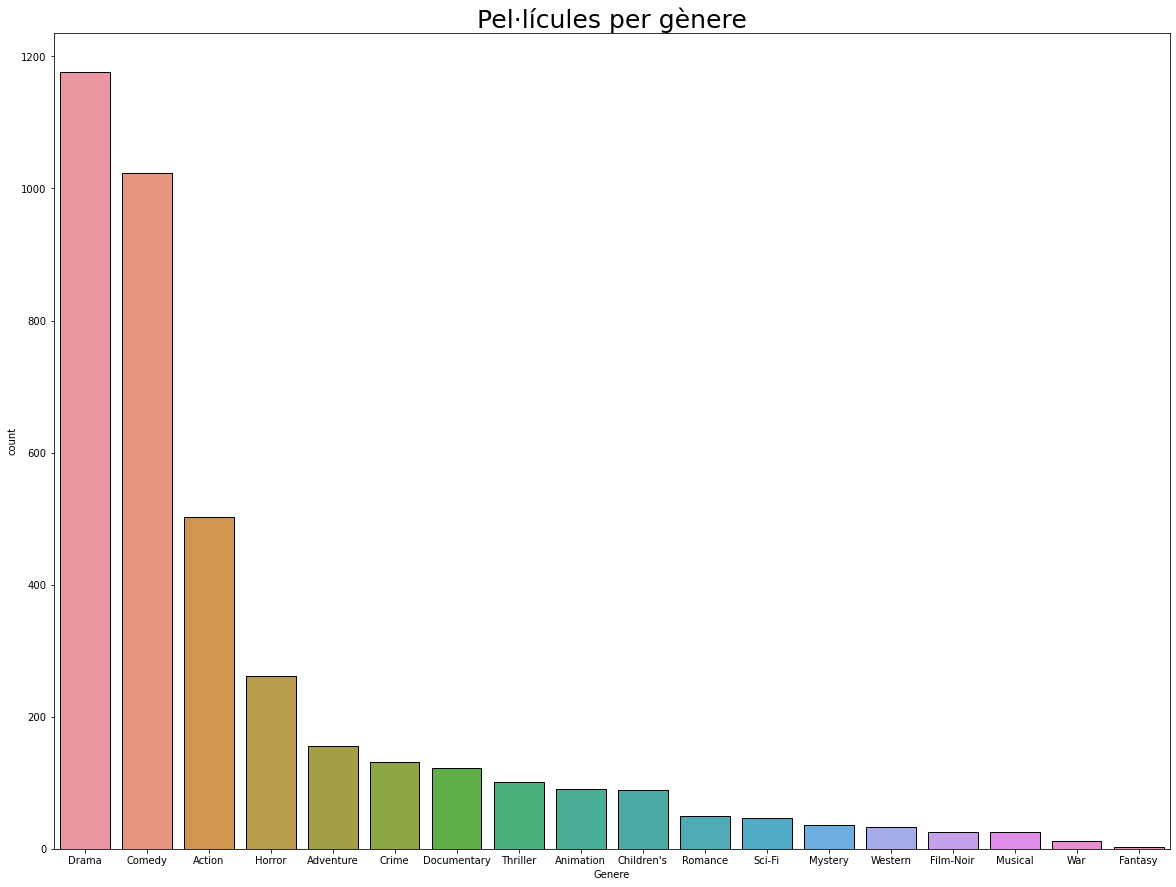

In [46]:
print(movies["Genere"].value_counts().sort_values(ascending=False))
plt.figure(figsize=(20,15))
sns.countplot(x='Genere', data=movies, order = movies['Genere'].value_counts().index, edgecolor="black");
plt.title('Pel·lícules per gènere', fontsize=25)
plt.show()

Veiem que el gènere de drama, el de comèdia i d'acció són els que més pel·lícules representen a la base de dades. Fantasia, guerra i musical són els gèneres amb menys pel·lícules.

Mostrem quantes pel·lícules per any s'han fet

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1919      3
1922      2
1920      2
1921      1
Name: Any, Length: 81, dtype: int64


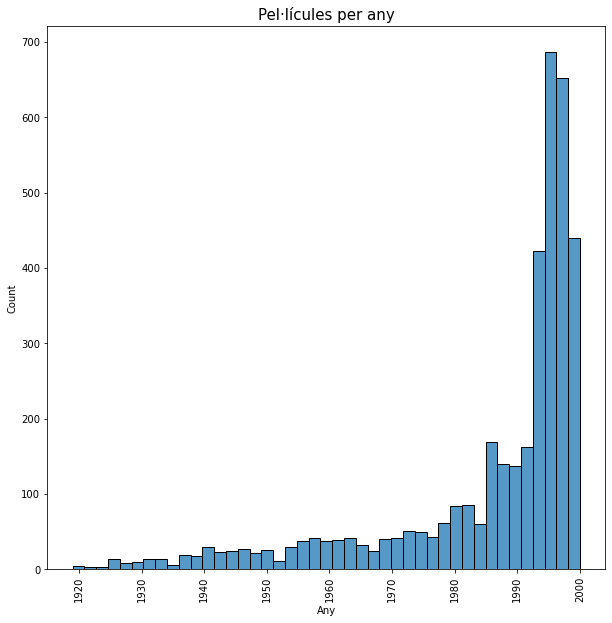

In [50]:
print(movies["Any"].value_counts())
plt.figure(figsize=(10,10))
sns.histplot(x="Any", data=movies, edgecolor="black")
plt.xticks(rotation=90);
plt.title('Pel·lícules per any', fontsize=15)
plt.show()

Veiem que el gran gruix de pel·lícules són fetes entre els anys 1990 i el 2000. 